In [1]:
# Data Manipulation 
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from pre_processing import load_data
import config

data = load_data(config.bank_additional_train_path)
data.process_all()
data = data.df

# One Hot Encodes
one_hot_cols = ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month']
dataset_bin_enc = pd.get_dummies(data, columns=one_hot_cols)

dataset_bin_enc.head()

# Label Encode
dataset_con_enc = data.apply(LabelEncoder().fit_transform)
dataset_con_enc.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,1,1,0,0,0,0,1,2,0,...,0,26,0,14970,8,18,16,287,8,0
1,40,1,1,0,1,0,0,1,2,0,...,0,26,0,21828,8,18,16,287,8,0
2,20,1,1,0,0,2,0,1,2,0,...,0,26,0,21829,8,18,16,287,8,0
3,23,0,1,0,0,0,0,1,2,0,...,0,26,0,21830,8,18,16,287,8,0
4,39,1,1,0,0,0,2,1,2,0,...,0,26,0,21831,8,18,16,287,8,0


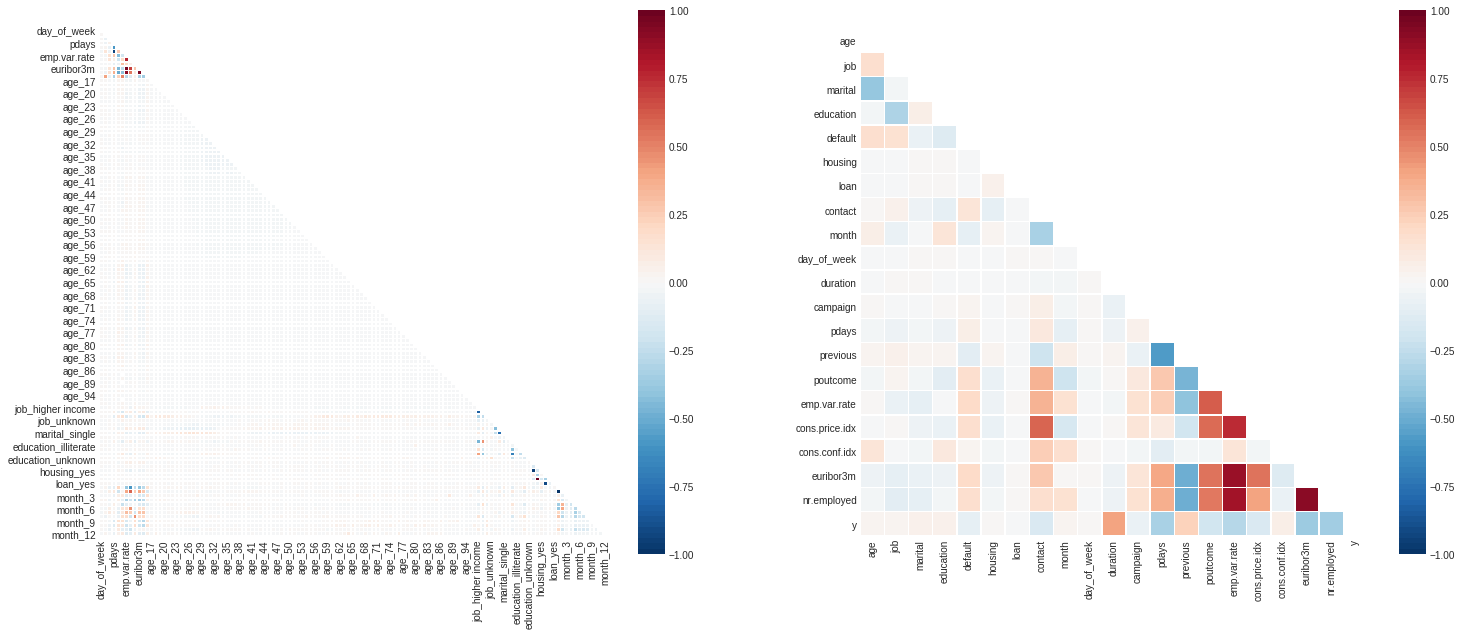

In [3]:
# create the relation-graph between 2 dataset
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10)) 

plt.subplot(1, 2, 1)

mask = np.zeros_like(dataset_bin_enc.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset_bin_enc.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("RdBu_r", 100), 
            mask=mask, 
            linewidths=.5);

plt.subplot(1, 2, 2)
mask = np.zeros_like(dataset_con_enc.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset_con_enc.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("RdBu_r", 100), 
            mask=mask, 
            linewidths=.5);

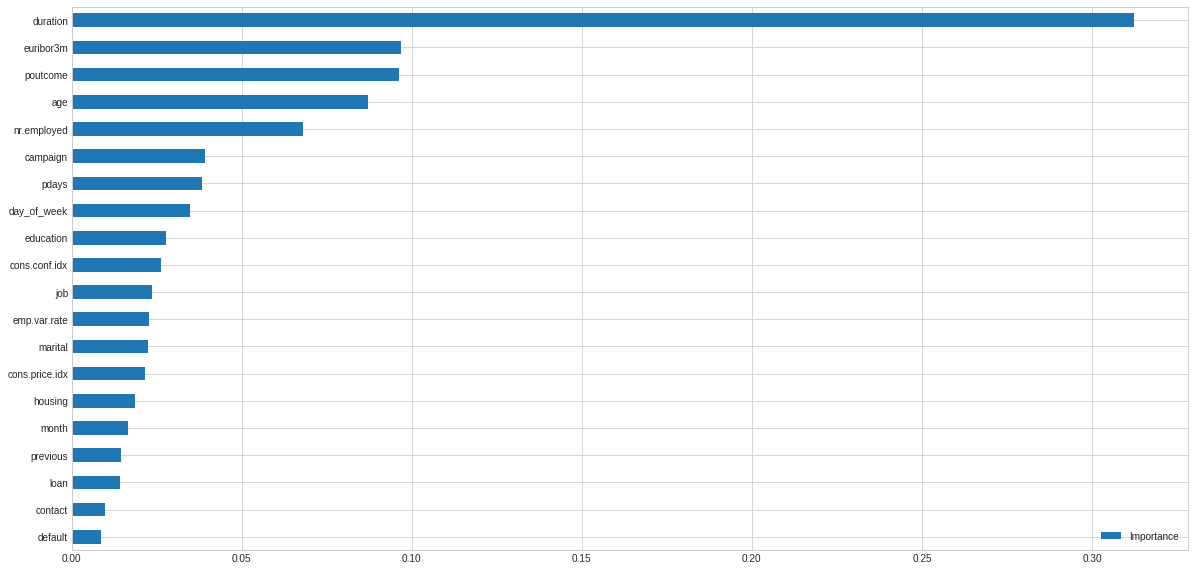

In [4]:
# Using Random Forest to gain an insight on Feature Importance
clf = RandomForestClassifier()
clf.fit(dataset_con_enc.drop('y', axis=1), dataset_con_enc['y'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=dataset_con_enc.drop('y', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));